<img src="https://www.th-koeln.de/img/logo.svg" style="float:right;" width="200">

# 3rd exercise: <font color="#C70039">Do DBScan clustering for anomaly detection</font>
* Course: AML
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>

* **Student: Tzu-Lun Yeh**
* **Matriculation Number: 11496498**
* **Date: 22.10.2025**


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/af/DBSCAN-Illustration.svg/400px-DBSCAN-Illustration.svg.png" style="float: center;" width="450">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information on your tasks (e.g. regarding the set of certain paramaters or a specific computational trick), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation please use English language, too
* This applies to all exercises throughout this course.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:
This notebook allows you for using the DBScan clustering algorithm for anomaly detection.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
The tasks that you need to work on within this notebook are always indicated below as bullet points. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done by using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab or use your local machine.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully 
    * add comments whereever you feel it necessary for better understanding
    * run the notebook for the first time. 
4. take the three data sets from exercize 1 and cluster them
5. read the following <a href="https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan">article</a> for getting help estimating eps and minPts
    * https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan
6. describe your findings and interpret the results
-----------------------------------------------------------------------------------

In [9]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn
np.random.seed(1)
random_data = np.random.randn(50000,2)  * 20 + 20

The output of the below code is 94. This is the total number of noisy points. SKLearn labels the noisy points as (-1). The downside with this method is that the higher the dimension, the less accurate it becomes. You also need to make a few assumptions like estimating the right value for eps which can be challenging.

In [10]:
# hyperparameters
minPts = 2
eps = 3

outlier_detection = DBSCAN(min_samples = minPts, eps = eps)

clusters = outlier_detection.fit_predict(random_data)

list(clusters).count(-1)

94

## Visualize DBSCAN Clustering Results

/var/folders/11/v8ntzdyn4_9bszphhpzgp6540000gn/T/ipykernel_70449/2920918297.py:18: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker,


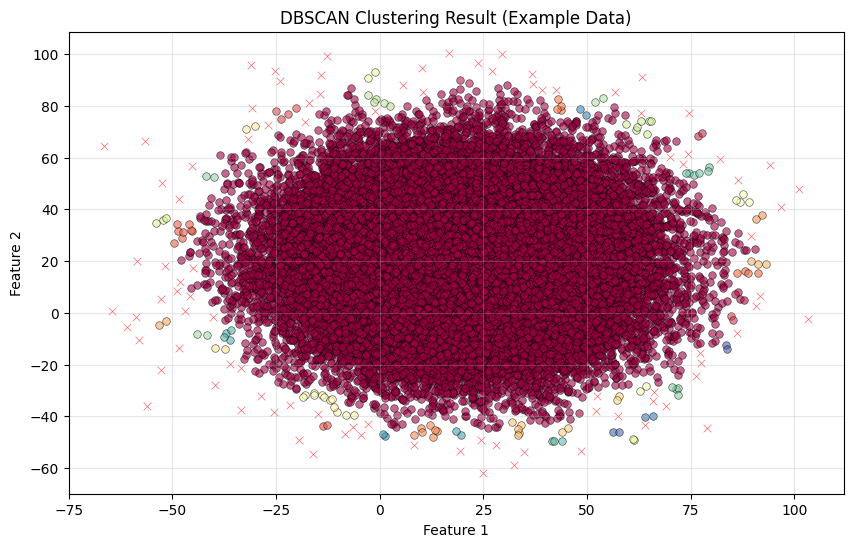

In [11]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))

# Plot clusters and anomalies
unique_labels = set(clusters)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:
        color = 'red'
        marker = 'x'
    else:
        marker = 'o'
    
    class_member_mask = (clusters == label)
    xy = random_data[class_member_mask]
    
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker, 
                s=30, alpha=0.6, edgecolors='k', linewidths=0.5)

plt.title('DBSCAN Clustering Result (Example Data)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, alpha=0.3)
plt.show()

---
## Helper Function: K-Distance Graph for Choosing eps

Based on the StackOverflow article, we use k-distance graph to find the optimal eps value.

In [41]:
from sklearn.neighbors import NearestNeighbors

def plot_k_distance_graph(data, k=4):
    """
    Plot k-distance graph to help choose eps parameter.
    Look for the elbow point in the graph.
    
    Parameters:
    - data: scaled data array
    - k: number of neighbors (should equal minPts)
    """
    # Calculate k-nearest neighbors distances
    nbrs = NearestNeighbors(n_neighbors=k)
    nbrs.fit(data)
    distances, indices = nbrs.kneighbors(data)
    
    # Sort the k-th nearest neighbor distances
    distances = np.sort(distances[:, k-1], axis=0)
    
    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(distances)
    plt.ylabel(f"k-NN distance (k={k})")
    plt.xlabel("Data points sorted by distance")
    plt.title("K-Distance Graph - Look for the elbow point")
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Calculate percentiles for identifying elbow point
    percentiles = [90, 92, 94, 95, 96, 97, 98, 99]
    values = []
    
    print("\nK-distance at key percentiles:")
    for p in percentiles:
        val = distances[int(len(distances) * p / 100)]
        values.append(val)
        print(f"  {p:2d}th: {val:.4f}")
    
    # Calculate jumps between consecutive percentiles
    print("\nJumps between percentiles:")
    for i in range(len(percentiles)-1):
        jump = values[i+1] - values[i]
        pct_increase = (jump / values[i]) * 100 if values[i] > 0 else 0
        print(f"  {percentiles[i]}% → {percentiles[i+1]}%: +{jump:.4f} ({pct_increase:.1f}% increase)")
    

---
---
## Task 4: Load Dataset 1 from Exercise 1

**Dataset 1: Heights and Weights Dataset**
- **Source**: https://www.kaggle.com/datasets/burnoutminer/heights-and-weights-dataset
- **Description**: Contains 25,000 records of human heights (inches) and weights (pounds) of 18-year-old individuals
- **Columns analyzed**: Height(Inches) and Weight(Pounds) for 2D clustering
- **Expected distribution**: Normal distribution (both height and weight typically follow normal distributions)

In [42]:
# Load the Heights and Weights dataset from Kaggle
import pandas as pd
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("burnoutminer/heights-and-weights-dataset")
print(f"Dataset downloaded to: {path}")

# Load the CSV file
import os
csv_path = os.path.join(path, "SOCR-HeightWeight.csv")
df_ds1 = pd.read_csv(csv_path)

# Display first 5 records
print("\nFirst 5 records:")
print(df_ds1.head())

# Display basic information
print("\nDataset Info:")
print(f"Total records: {len(df_ds1)}")
print(f"Columns: {list(df_ds1.columns)}")

# Extract Height and Weight columns for 2D clustering
data_ds1 = df_ds1[['Height(Inches)', 'Weight(Pounds)']].values
print(f"\nData shape: {data_ds1.shape}")
print(f"Height range: {data_ds1[:, 0].min():.2f} - {data_ds1[:, 0].max():.2f} inches")
print(f"Weight range: {data_ds1[:, 1].min():.2f} - {data_ds1[:, 1].max():.2f} pounds")

Dataset downloaded to: /Users/tly/.cache/kagglehub/datasets/burnoutminer/heights-and-weights-dataset/versions/1

First 5 records:
   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971

Dataset Info:
Total records: 25000
Columns: ['Index', 'Height(Inches)', 'Weight(Pounds)']

Data shape: (25000, 2)
Height range: 60.28 - 75.15 inches
Weight range: 78.01 - 170.92 pounds


## Task 5: Execute DBSCAN on Dataset 1

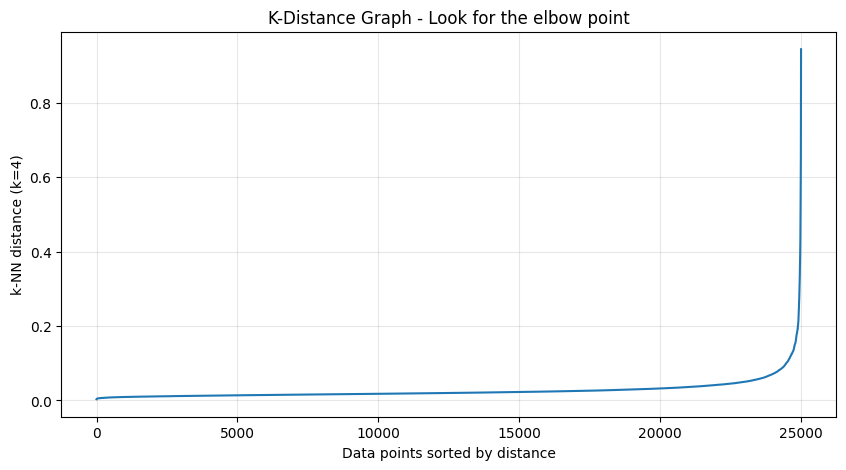


K-distance at key percentiles:
  90th: 0.0453
  92th: 0.0503
  94th: 0.0577
  95th: 0.0635
  96th: 0.0712
  97th: 0.0828
  98th: 0.1023
  99th: 0.1405

Jumps between percentiles:
  90% → 92%: +0.0050 (11.0% increase)
  92% → 94%: +0.0074 (14.8% increase)
  94% → 95%: +0.0057 (9.9% increase)
  95% → 96%: +0.0078 (12.2% increase)
  96% → 97%: +0.0116 (16.3% increase)
  97% → 98%: +0.0195 (23.6% increase)
  98% → 99%: +0.0381 (37.3% increase)


In [43]:
# First, standardize the data
from sklearn.preprocessing import StandardScaler

scaler_ds1 = StandardScaler()
data_ds1_scaled = scaler_ds1.fit_transform(data_ds1)

# Use k-distance graph to determine optimal eps
plot_k_distance_graph(data_ds1_scaled, k=4)

In [57]:
# Set DBSCAN parameters based on k-distance graph
# minPts = 4 (recommended for 2D data: D+1 where D=2)
# eps = 0.5 (chosen based on elbow point from k-distance graph)
minPts_ds1 = 4
eps_ds1 = 0.0635

# Execute DBSCAN
dbscan_ds1 = DBSCAN(eps=eps_ds1, min_samples=minPts_ds1)
clusters_ds1 = dbscan_ds1.fit_predict(data_ds1_scaled)

# Calculate statistics
noise_count_ds1 = list(clusters_ds1).count(-1)
num_clusters_ds1 = len(set(clusters_ds1)) - (1 if -1 in clusters_ds1 else 0)
anomaly_percentage_ds1 = (noise_count_ds1 / len(data_ds1)) * 100

print(f"Dataset 1 - Heights & Weights:")
print(f"Total data points: {len(data_ds1)}")
print(f"Number of clusters found: {num_clusters_ds1}")
print(f"Total noise points (anomalies): {noise_count_ds1}")
print(f"Anomaly percentage: {anomaly_percentage_ds1:.4f}%")

Dataset 1 - Heights & Weights:
Total data points: 25000
Number of clusters found: 72
Total noise points (anomalies): 906
Anomaly percentage: 3.6240%


## Task 6: Visualize DBSCAN Results for Dataset 1

/var/folders/11/v8ntzdyn4_9bszphhpzgp6540000gn/T/ipykernel_70449/3053417208.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker,


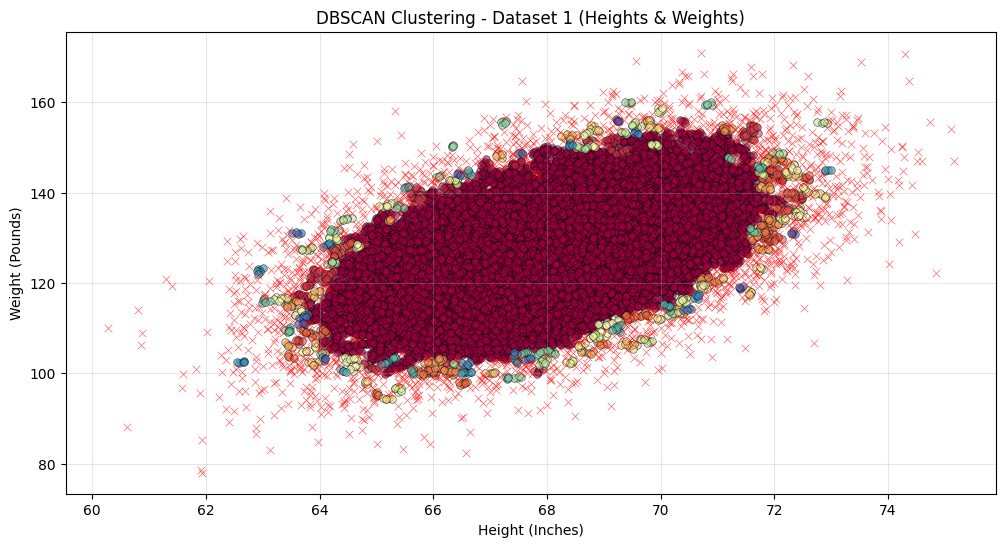

In [51]:
# Visualize the clustering results for Dataset 1
plt.figure(figsize=(12, 6))

unique_labels_ds1 = set(clusters_ds1)
colors_ds1 = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_ds1)))

for label, color in zip(unique_labels_ds1, colors_ds1):
    if label == -1:
        color = 'red'
        marker = 'x'
        zorder = 2
    else:
        marker = 'o'
        zorder = 1
    
    class_member_mask = (clusters_ds1 == label)
    xy = data_ds1[class_member_mask]
    
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker, 
                s=30, alpha=0.6, edgecolors='k', linewidths=0.5, zorder=zorder)

plt.title(f'DBSCAN Clustering - Dataset 1 (Heights & Weights)')
plt.xlabel('Height (Inches)')
plt.ylabel('Weight (Pounds)')
plt.grid(True, alpha=0.3)
plt.show()

## Findings for Dataset 1

The dataset forms a single main cluster. Anomalies (red X marks) are scattered around the edges, representing unusual height-weight combinations.

---
---
## Task 4: Load Dataset 2 from Exercise 1

**Dataset 2: Apple iPhone Sales Data (2007-2025) - Customer Satisfaction & Rating**
- **Source**: https://www.kaggle.com/datasets/vengateshvengat/apple-iphone-complete-data-2007-2025
- **Description**: 81,260 iPhone sales records from India (2007-2025) with customer feedback
- **Columns analyzed**: customer_satisfaction_percent and rating for 2D clustering
- **Expected distribution**: Normal distribution (customer satisfaction and ratings typically follow normal distributions)

In [46]:
# Load the Apple iPhone Sales dataset from Kaggle
path = kagglehub.dataset_download("vengateshvengat/apple-iphone-complete-data-2007-2025")
print(f"Dataset downloaded to: {path}")

# Load the CSV file
csv_path = os.path.join(path, "iphone_india_full.csv")
df_ds2 = pd.read_csv(csv_path)

# Display first 5 records
print("\nFirst 5 records:")
print(df_ds2.head())

# Display basic information
print("\nDataset Info:")
print(f"Total records: {len(df_ds2)}")
print(f"Columns: {list(df_ds2.columns)}")

# Extract customer_satisfaction_percent and rating columns for 2D clustering
data_ds2 = df_ds2[['customer_satisfaction_percent', 'rating']].values
print(f"\nData shape: {data_ds2.shape}")
print(f"Customer Satisfaction range: {data_ds2[:, 0].min():.2f}% - {data_ds2[:, 0].max():.2f}%")
print(f"Rating range: {data_ds2[:, 1].min():.2f} - {data_ds2[:, 1].max():.2f}")

Dataset downloaded to: /Users/tly/.cache/kagglehub/datasets/vengateshvengat/apple-iphone-complete-data-2007-2025/versions/1

First 5 records:
   sale_id  model_id         model_name                  variant_name  \
0    73749        33  iPhone 13 Pro Max  iPhone 13 Pro Max 256GB Blue   
1    47832        28      iPhone 12 Pro    iPhone 12 Pro 128GB Purple   
2    24348         6           iPhone 5           iPhone 5 32GB Black   
3     2461         4           iPhone 4           iPhone 4 16GB Black   
4    64976         5          iPhone 4s          iPhone 4s 16GB White   

  sale_date  year  month      region       city            channel  ...  \
0   2025-02  2025      2  Tamil Nadu    Madurai  Authorized Dealer  ...   
1   2022-05  2022      5      Punjab   Ludhiana             Retail  ...   
2   2018-11  2018     11     Gujarat  Ahmedabad             Retail  ...   
3   2010-09  2010      9   Telangana   Warangal             Online  ...   
4   2024-04  2024      4      Punjab   Ludhi

## Task 5: Execute DBSCAN on Dataset 2

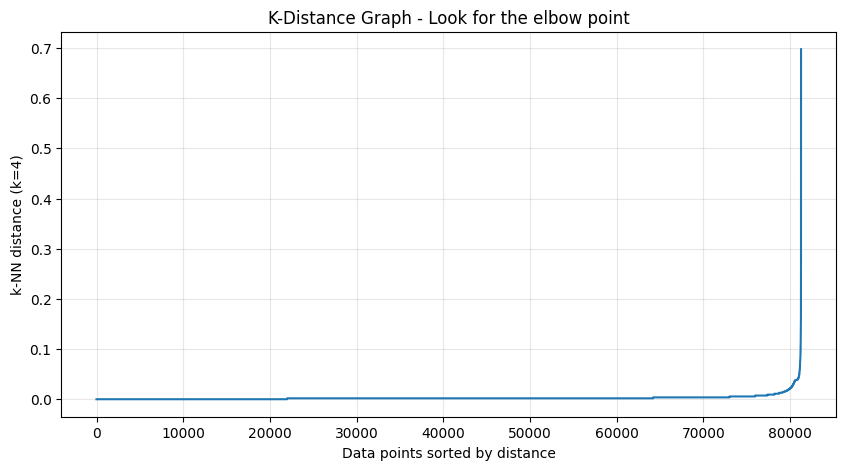


K-distance at key percentiles:
  90th: 0.0055
  92th: 0.0055
  94th: 0.0073
  95th: 0.0073
  96th: 0.0092
  97th: 0.0128
  98th: 0.0165
  99th: 0.0330

Jumps between percentiles:
  90% → 92%: +0.0000 (0.0% increase)
  92% → 94%: +0.0018 (33.3% increase)
  94% → 95%: +0.0000 (0.0% increase)
  95% → 96%: +0.0018 (25.0% increase)
  96% → 97%: +0.0037 (40.0% increase)
  97% → 98%: +0.0037 (28.6% increase)
  98% → 99%: +0.0165 (100.0% increase)


In [47]:
# Standardize the data
scaler_ds2 = StandardScaler()
data_ds2_scaled = scaler_ds2.fit_transform(data_ds2)

# Use k-distance graph to determine optimal eps
plot_k_distance_graph(data_ds2_scaled, k=4)

In [48]:
# Set DBSCAN parameters based on k-distance graph
# minPts = 4 (recommended for 2D data)
# eps = 0.5 (chosen based on elbow point from k-distance graph)
minPts_ds2 = 4
eps_ds2 = 0.0092

# Execute DBSCAN
dbscan_ds2 = DBSCAN(eps=eps_ds2, min_samples=minPts_ds2)
clusters_ds2 = dbscan_ds2.fit_predict(data_ds2_scaled)

# Calculate statistics
noise_count_ds2 = list(clusters_ds2).count(-1)
num_clusters_ds2 = len(set(clusters_ds2)) - (1 if -1 in clusters_ds2 else 0)
anomaly_percentage_ds2 = (noise_count_ds2 / len(data_ds2)) * 100

print(f"Dataset 2 - Customer Satisfaction & Rating:")
print(f"Total data points: {len(data_ds2)}")
print(f"Number of clusters found: {num_clusters_ds2}")
print(f"Total noise points (anomalies): {noise_count_ds2}")
print(f"Anomaly percentage: {anomaly_percentage_ds2:.4f}%")

Dataset 2 - Customer Satisfaction & Rating:
Total data points: 81260
Number of clusters found: 750
Total noise points (anomalies): 2294
Anomaly percentage: 2.8230%


## Task 6: Visualize DBSCAN Results for Dataset 2

/var/folders/11/v8ntzdyn4_9bszphhpzgp6540000gn/T/ipykernel_70449/2333622429.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker,


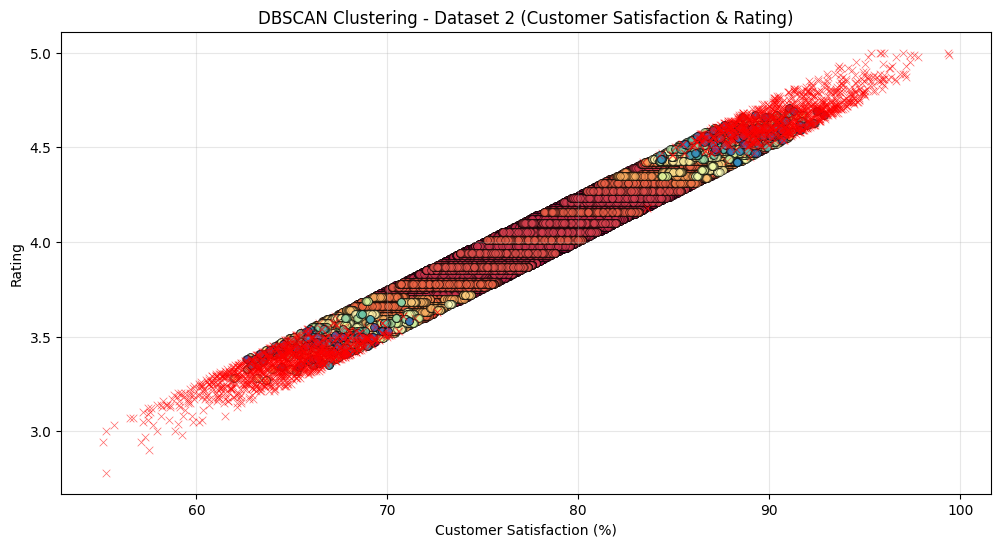

In [49]:
# Visualize the clustering results for Dataset 2
plt.figure(figsize=(12, 6))

unique_labels_ds2 = set(clusters_ds2)
colors_ds2 = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_ds2)))

for label, color in zip(unique_labels_ds2, colors_ds2):
    if label == -1:
        color = 'red'
        marker = 'x'
        zorder = 2
    else:
        marker = 'o'
        zorder = 1
    
    class_member_mask = (clusters_ds2 == label)
    xy = data_ds2[class_member_mask]
    
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker, 
                s=30, alpha=0.6, edgecolors='k', linewidths=0.5, zorder=zorder)

plt.title(f'DBSCAN Clustering - Dataset 2 (Customer Satisfaction & Rating)')
plt.xlabel('Customer Satisfaction (%)')
plt.ylabel('Rating')
plt.grid(True, alpha=0.3)
plt.show()

## Findings for Dataset 2

The dataset shows a positive correlation between customer satisfaction and rating. Anomalies appear at extremes (high satisfaction with low rating or vice versa).

---
---
## Task 4: Load Dataset 3 from Exercise 1

**Dataset 3: Spotify User Churn Analysis - Ads & Listening Time (Non-Normal Distribution)**
- **Source**: https://www.kaggle.com/datasets/nabihazahid/spotify-dataset-for-churn-analysis
- **Description**: 8,000 Spotify user records with listening behavior and subscription data
- **Columns analyzed**: ads_listened_per_week and listening_time for 2D clustering
- **Expected distribution**: Non-normal distribution (Bimodal - two distinct user groups based on ad exposure levels)

In [18]:
# Load the Spotify Churn dataset from Kaggle
path = kagglehub.dataset_download("nabihazahid/spotify-dataset-for-churn-analysis")
print(f"Dataset downloaded to: {path}")

# Load the CSV file
csv_path = os.path.join(path, "spotify_churn_dataset.csv")
df_ds3 = pd.read_csv(csv_path)

# Display first 5 records
print("\nFirst 5 records:")
print(df_ds3.head())

# Display basic information
print("\nDataset Info:")
print(f"Total records: {len(df_ds3)}")
print(f"Columns: {list(df_ds3.columns)}")

# Extract ads_listened_per_week and listening_time columns for 2D clustering
data_ds3 = df_ds3[['ads_listened_per_week', 'listening_time']].values
print(f"\nData shape: {data_ds3.shape}")
print(f"Ads per week range: {data_ds3[:, 0].min()} - {data_ds3[:, 0].max()} ads/week")
print(f"Listening time range: {data_ds3[:, 1].min()} - {data_ds3[:, 1].max()} minutes")

Dataset downloaded to: /Users/tly/.cache/kagglehub/datasets/nabihazahid/spotify-dataset-for-churn-analysis/versions/2

First 5 records:
   user_id  gender  age country subscription_type  listening_time  \
0        1  Female   54      CA              Free              26   
1        2   Other   33      DE            Family             141   
2        3    Male   38      AU           Premium             199   
3        4  Female   22      CA           Student              36   
4        5   Other   29      US            Family             250   

   songs_played_per_day  skip_rate device_type  ads_listened_per_week  \
0                    23       0.20     Desktop                     31   
1                    62       0.34         Web                      0   
2                    38       0.04      Mobile                      0   
3                     2       0.31      Mobile                      0   
4                    57       0.36      Mobile                      0   

   offline

## Task 5: Execute DBSCAN on Dataset 3

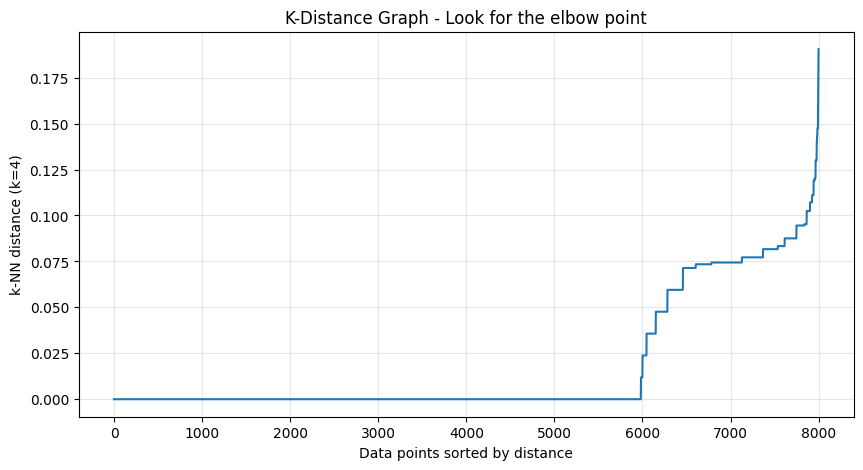


K-distance at key percentiles:
  90th: 0.0772
  92th: 0.0772
  94th: 0.0817
  95th: 0.0833
  96th: 0.0875
  97th: 0.0945
  98th: 0.0952
  99th: 0.1071

Jumps between percentiles:
  90% → 92%: +0.0000 (0.0% increase)
  92% → 94%: +0.0045 (5.8% increase)
  94% → 95%: +0.0017 (2.0% increase)
  95% → 96%: +0.0042 (5.0% increase)
  96% → 97%: +0.0070 (8.0% increase)
  97% → 98%: +0.0007 (0.7% increase)
  98% → 99%: +0.0119 (12.5% increase)


In [58]:
# Standardize the data
scaler_ds3 = StandardScaler()
data_ds3_scaled = scaler_ds3.fit_transform(data_ds3)

# Use k-distance graph to determine optimal eps
plot_k_distance_graph(data_ds3_scaled, k=4)

In [59]:
# Set DBSCAN parameters based on k-distance graph
# minPts = 4 (recommended for 2D data)
# eps = 0.5 (chosen based on elbow point from k-distance graph)
minPts_ds3 = 4
eps_ds3 = 0.0125

# Execute DBSCAN
dbscan_ds3 = DBSCAN(eps=eps_ds3, min_samples=minPts_ds3)
clusters_ds3 = dbscan_ds3.fit_predict(data_ds3_scaled)

# Calculate statistics
noise_count_ds3 = list(clusters_ds3).count(-1)
num_clusters_ds3 = len(set(clusters_ds3)) - (1 if -1 in clusters_ds3 else 0)
anomaly_percentage_ds3 = (noise_count_ds3 / len(data_ds3)) * 100

print(f"Dataset 3 - Ads Per Week & Listening Time:")
print(f"Total data points: {len(data_ds3)}")
print(f"Number of clusters found: {num_clusters_ds3}")
print(f"Total noise points (anomalies): {noise_count_ds3}")
print(f"Anomaly percentage: {anomaly_percentage_ds3:.4f}%")

Dataset 3 - Ads Per Week & Listening Time:
Total data points: 8000
Number of clusters found: 7
Total noise points (anomalies): 1992
Anomaly percentage: 24.9000%


## Task 6: Visualize DBSCAN Results for Dataset 3

/var/folders/11/v8ntzdyn4_9bszphhpzgp6540000gn/T/ipykernel_70449/1825697161.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker,


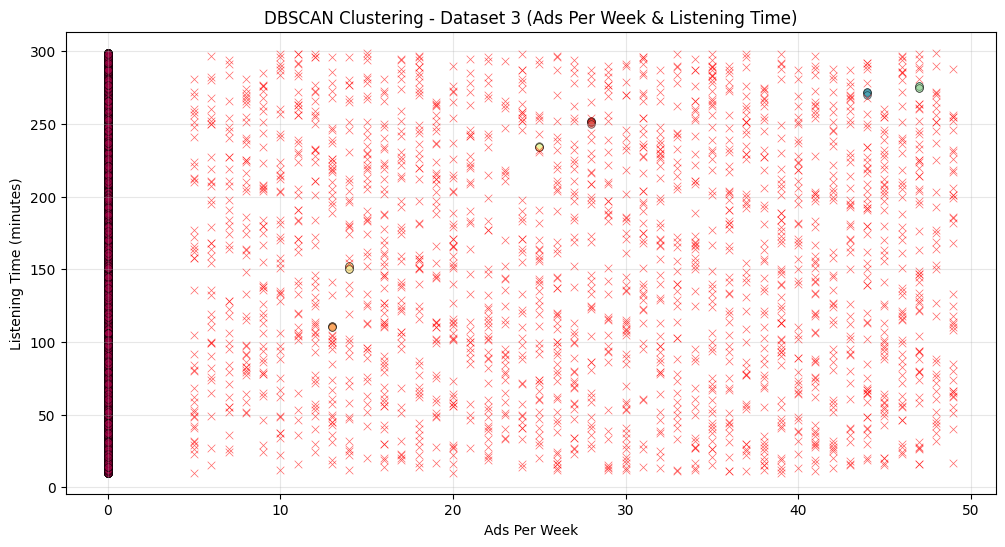

In [60]:
# Visualize the clustering results for Dataset 3
plt.figure(figsize=(12, 6))

unique_labels_ds3 = set(clusters_ds3)
colors_ds3 = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_ds3)))

for label, color in zip(unique_labels_ds3, colors_ds3):
    if label == -1:
        color = 'red'
        marker = 'x'
        zorder = 2
    else:
        marker = 'o'
        zorder = 1
    
    class_member_mask = (clusters_ds3 == label)
    xy = data_ds3[class_member_mask]
    
    plt.scatter(xy[:, 0], xy[:, 1], c=[color], marker=marker, 
                s=30, alpha=0.6, edgecolors='k', linewidths=0.5, zorder=zorder)

plt.title(f'DBSCAN Clustering - Dataset 3 (Ads Per Week & Listening Time)')
plt.xlabel('Ads Per Week')
plt.ylabel('Listening Time (minutes)')
plt.grid(True, alpha=0.3)
plt.show()

## Findings for Dataset 3

Multiple clusters appear based on ad exposure levels: users with 0 ads/week and users with high ads/week. DBSCAN successfully identifies these different user groups without assuming normal distribution.

---
---
## Task 6: Overall Findings and Conclusions

### Key Findings

**Normal Distributions (Datasets 1 & 2):**
- Both formed single clusters with low anomaly percentages
- DBSCAN effectively identified outliers at the periphery

**Non-Normal Distribution (Dataset 3):**
- Identified multiple clusters based on ad exposure levels (0 ads vs high ads)
- DBSCAN adapted to the skewed distribution naturally

**Advantages of DBSCAN:**
- Works on both normal and non-normal distributions
- Can identify multiple clusters of varying shapes
- Detects anomalies based on density rather than statistical assumptions

**Limitations:**
- Requires parameter tuning (eps and minPts can be challenging to choose)
- Less effective in high-dimensional spaces